# Numerical Solution of Space-Heterogeneous Model

In [1]:
import numpy as np
from numpy.random import normal, uniform

from pandas import DataFrame #For visualising arrays easily

import pickle

import scipy.stats as stats
from scipy.integrate import simps

import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import plotting_tools as easyplt
import herding as herd

In [2]:
def run_particle_model(particle_count=10, D=1, dt=0.01, T_end=1,
                   initial_dist_x=uniform(size=10),
                   initial_dist_v=uniform(size=10), G=herd.step_G):
    """ Space-Inhomogeneous Particle model
    
    Calculates the solution of the space-inhomogeneous particle model using an 
    Euler-Maruyama scheme.
    
    Args:
        particles: Number of particles to simulate, int.
        D: Diffusion coefficient denoted sigma in equation, float.
        initial_dist_x: Array containing initial positions of particles.
        initial_dist_v: Array containing initial velocities of particles.
        dt: Time step to be use in E-M scheme, float.
        T_end: Time point at which to end simulation, float.
        G: Interaction function - refer to herding.py.
        
    Returns:
        t: array of times at which velocities were calculated (only used for
           plotting).         
        v: array containing velocities of each particle at every timestep.
   
    """
    steps = int(T_end/dt)
    v = np.zeros((steps+1, particle_count), dtype=float)
    x = np.zeros((steps+1, particle_count), dtype=float)

    #Initial Condition
    v[0, :] = initial_dist_v
    x[0, :] = initial_dist_x
    
    for n in range(steps):
        x_curr = x[n, :]
        v_curr = v[n, :]
        x[n+1, :] = (x_curr + v_curr*dt) % (2*np.pi) # Restrict to torus
        v[n+1, :] = (v_curr - v_curr*dt + G(herd.phi_part(v[n, :]))*dt 
                     + np.sqrt(2*D*dt) * normal(size=particle_count))
    t = np.arange(0, T_end+dt, dt)
    
    return t, x, v

In [ ]:
%matplotlib inline


# test_data = {"Time": t_1,
#              "Position": x_1, 
#              "Velocity": v_1}
# pickle.dump(test_data, open('Test_Data/test_data', "wb"))


plt.plot(t_1, v_1[:, 0])
plt.plot(t_2, v_2[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.show()


In [ ]:
#Must be written twice, bug in Jupyter
%matplotlib qt
%matplotlib qt

easyplt.plot_together(-1, t_1, x_1, v_1)

In [16]:
%matplotlib qt
t_1, x_1, v_1 = run_particle_model(particle_count=100, D=1,
                          initial_dist_x=np.pi/2,
                          initial_dist_v=uniform(low=0, high=1, size=100),
                          dt=0.01, T_end=200, G=herd.step_G)
#conv_to_pos  = easyplt.anim_full(t_1, x_1, v_1, framestep=5)

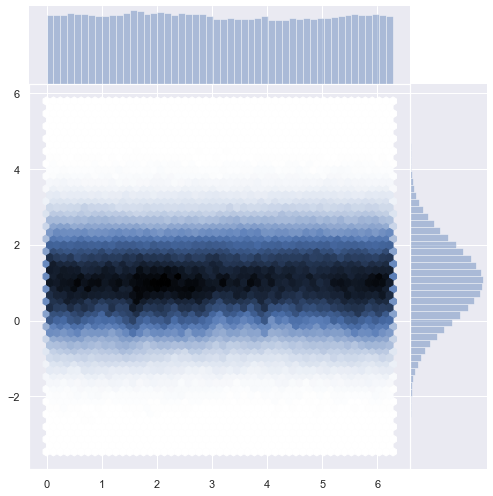

In [20]:
%matplotlib inline
g = sns.jointplot(x_1.flatten(), v_1.flatten(), kind="hex", height=7, space=0)
# g = (sns.jointplot(x_1[-10:-1,].flatten(), v_1[-10:-1,].flatten(), color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

In [ ]:
writer = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
conv_to_pos.save('conv_to_pos.mp4', writer=writer)

In [ ]:
%matplotlib qt
#plot with moments
t_2, x_2, v_2= run_particle_model(particle_count=1000, D=1,
                          initial_dist_x=np.pi/2,
                          initial_dist_v=-0.5,
                          dt=0.01, T_end=15, G=herd.smooth_G)

conv_to_neg = anim_full_moments(t_2, x_2, v_2, framestep=2)

In [ ]:
writer = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
conv_to_neg.save('conv_to_neg.mp4', writer=writer)

In [6]:
%matplotlib qt
t_3, x_3, v_3 = run_particle_model(particle_count=10, D=1,
                          initial_dist_x=np.pi/2,
                          initial_dist_v=normal(loc=0.01,scale=np.sqrt(2),size=10),
                          dt=0.01, T_end=100, G=herd.smooth_G)
plot_together(-1, t_3, x_3, v_3)


In [10]:
switch = anim_full_timehist(t_3, x_3, v_3, framestep=30)

C:\Users\s1415551\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [11]:
writer = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
switch.save('switch1.mp4', writer=writer)

C:\Users\s1415551\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [ ]:
#Saving output as .mp4 (may take a while)
writer = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
ani1.save('1particles.mp4', writer=writer)


In [9]:
#histogram through time
def anim_full_timehist(t, x, v, framestep=1):
    fig = plt.figure(figsize=(20,10))
    fig.patch.set_alpha(0.0)

    grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.5)

    big_ax = plt.subplot(grid[0:2,0:2])
    pos_ax = plt.subplot(grid[0,2])
    vel_ax = plt.subplot(grid[1,2])

    an = np.linspace(0, 2*np.pi, 100)
    big_ax.plot(np.cos(an), np.sin(an),'--', alpha=0.5)
    big_ax.axis('equal')
    fig.suptitle('t = {}'.format(t[0]), fontsize = 25)
    ### Plotting particles on torus #####
    big_ax.set_ylim(-1.1 ,1.1)
    big_ax.set_xlim(-1.1 ,1.1)

     #Horrible trick to plot different colours -- look for way to pass color argument in one go
    pos_vel = [x[0, idx] if vel >= 0 else None for  idx, vel in enumerate(v[0,:])]
    pos_vel = [x for x in pos_vel if x is not None]
    neg_vel = [x[0, idx] if vel <= 0 else None for  idx, vel in enumerate(v[0,:])]
    neg_vel = [x for x in neg_vel if x is not None]
    #x and y wrong way round so that +ve vel is clockwise
    neg_points, = big_ax.plot(np.sin(neg_vel), np.cos(neg_vel), linestyle='None', marker='o', alpha=0.8, ms=10)
    pos_points, = big_ax.plot(np.sin(pos_vel), np.cos(pos_vel), linestyle='None', marker='o', alpha=0.8, ms=8)

    big_ax.tick_params(axis='both', which='major', labelsize=20)
    big_ax.set_xlabel('x', fontsize=25)
    big_ax.set_ylabel('y', fontsize=25)
    #########################################

    ##Plotting vel histogram
    n_v, bins_v, patches_v = vel_ax.hist(v[0,:], bins=np.arange(v.min(), v.max(), 0.15),
                                         density=True, label='Velocity')

    vel_ax.set_ylim(0, 1.05)
    vel_ax.set_xlim(v.min(), v.max())

    mu = np.sign(np.mean(v[0,:]))
    sigma = np.sqrt(1)

    _v = np.arange(mu - 5*sigma, mu + 5*sigma, 0.01)
    vel_ax.plot(_v, stats.norm.pdf(_v, mu, sigma), label=r'Stationary D$^{\mathrm{n}}$')

    vel_ax.set_xlabel('Velocity', fontsize=20)
    vel_ax.set_ylabel('Density', fontsize=20)


    #PLotting pos histogram
    n_x, bins_x, patches_x = pos_ax.hist(x[0,:], bins=np.arange(x.min(), x.max(), 0.15),
                                         density=True, label='Position')

    pos_ax.set_ylim(0,1.05)
    pos_ax.set_xlim(x.min(), x.max())

    def format_func(value, tick_number):
        # find number of multiples of pi/2
        N = int(np.round(2 * value / np.pi))
        if N == 0:
            return "0"
        elif N == 1:
            return r"$\pi/2$"
        elif N == 2:
            return r"$\pi$"
        elif N % 2 > 0:
            return r"${0}\pi/2$".format(N)
        else:
            return r"${0}\pi$".format(N // 2)

    pos_ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    pos_ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    pos_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    mu = 1/(2*np.pi)

    _x = [x.min(), x.max()]
    pos_ax.plot(_x, [mu,mu], label=r'Stationary D$^{\mathrm{n}}$')

    pos_ax.set_xlabel(r'Position ($\theta$)',  fontsize=20)
    pos_ax.set_ylabel('Density',  fontsize=20)

    def animate(i,framestep):
        #Particles
        pos_vel = [x[i*framestep,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i*framestep,:])]
        pos_vel = [x for x in pos_vel if x is not None]
        neg_vel = [x[i*framestep,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i*framestep,:])]
        neg_vel = [x for x in neg_vel if x is not None]
        pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
        neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
        ####

        n_v, _ = np.histogram(v[:i*framestep, :],  bins=np.arange(v.min(), v.max(), 0.15), density=True)
        n_x, _ = np.histogram(x[:i*framestep, :],  bins=np.arange(x.min(), x.max(), 0.15), density=True)

        #Update vel data
        for rect_v, height_v in zip(patches_v, n_v):
              rect_v.set_height(height_v)
        #Update pos data
        for rect_x, height_x in zip(patches_x, n_x):
              rect_x.set_height(height_x)

        fig.suptitle('t = {:.2f}'.format(t[i*framestep]), fontsize=25)
        fig.show()

    ani = animation.FuncAnimation(fig, lambda i: animate(i, framestep), interval=60, frames=len(t)//framestep)

    return ani

In [4]:
def plot_torus(time_point, t, x, v, ax):
    '''return animated torus to be plotted on grid '''
    #fig, ax = plt.subplots()
    an = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(an), np.sin(an),'--', alpha = 0.5)
    ax.axis('equal')
    #fig.suptitle('t = {}'.format(t[0]), fontsize = 25)

    ### Plotting particles on torus #####
    ax.set_ylim(-1.1 ,1.1)
    ax.set_xlim(-1.1 ,1.1)

    #Horrible trick to plot different colours -- look for way to pass color argument in one go
    pos_vel = [x[time_point, idx] if vel >= 0 else None for  idx, vel in enumerate(v[time_point,:])]
    pos_vel = [x for x in pos_vel if x is not None]
    neg_vel = [x[time_point, idx] if vel <= 0 else None for  idx, vel in enumerate(v[time_point,:])]
    neg_vel = [x for x in neg_vel if x is not None]
    #x and y wrong way round so that +ve vel is clockwise
    neg_points, = ax.plot(np.sin(neg_vel), np.cos(neg_vel), linestyle='None',
                          marker='o')
    pos_points, = ax.plot(np.sin(pos_vel), np.cos(pos_vel), linestyle='None',
                          marker='o')

    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('x', fontsize = 25)
    ax.set_ylabel('y', fontsize = 25)

    return ax


def plot_vel_hist(time_point, t, x, v, ax):
    '''return final histogram '''
    n, bins, patches = ax.hist(v[:time_point,:],  bins=np.arange(v.min(), v.max(), 0.15),
                               density=True, label='Velocity')

    ax.set_ylim(0,1.05)
    ax.set_xlim(v.min(), v.max())

    mu = np.sign(np.mean(v[0,:]))
    sigma = 1

    _v = np.arange(mu - 5*sigma, mu + 5*sigma, 0.01)
    ax.plot(_v, stats.norm.pdf(_v, mu, sigma), label=r'Stationary D$^{\mathrm{n}}$')

    ax.set_xlabel('Velocity', fontsize=20)
    ax.set_ylabel('Density', fontsize=20)
    return ax


def plot_pos_hist(time_point, t, x, v, ax):
    '''return final histogram '''
    n, bins, patches = ax.hist(x[:time_point,:],  bins=np.arange(x.min(), x.max(), 0.15),
                                         density=True, label='Position')

    ax.set_ylim(0,1.05)
    ax.set_xlim(x.min(), x.max())

    def _format_func(value, tick_number):
        # find number of multiples of pi/2
        N = int(np.round(2 * value / np.pi))
        if N == 0:
            return "0"
        elif N == 1:
            return r"$\pi/2$"
        elif N == 2:
            return r"$\pi$"
        elif N % 2 > 0:
            return r"${0}\pi/2$".format(N)
        else:
            return r"${0}\pi$".format(N // 2)

    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(_format_func))

    mu = 1/(2*np.pi)

    _x = [x.min(), x.max()]
    ax.plot(_x, [mu,mu], label = r'Stationary D$^{\mathrm{n}}$')

    ax.set_xlabel(r'Position ($\theta$)', fontsize=20)
    ax.set_ylabel('Density', fontsize=20)

    return ax

def plot_together(time_point, t, x, v):
    '''Take axes objects and plot them on a grid'''
    fig = plt.figure(figsize=(20,10))
    fig.patch.set_alpha(0.0)
    grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.5)

    big_ax = plt.subplot(grid[0:2,0:2])
    pos_ax = plt.subplot(grid[0,2])
    vel_ax = plt.subplot(grid[1,2])

    plot_pos_hist(time_point, t, x, v, pos_ax)
    plot_vel_hist(time_point, t, x, v, vel_ax)
    plot_torus(time_point, t, x, v, big_ax)

    fig.show()


In [ ]:
#histogram through time
def anim_full_moments(t, x, v, framestep=1):
    fig = plt.figure(figsize=(20,10))
    fig.patch.set_alpha(0.0)

    grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.5)

    big_ax = plt.subplot(grid[0:2,0:2])
    pos_ax = plt.subplot(grid[0,2])
    vel_ax = plt.subplot(grid[1,2])

    an = np.linspace(0, 2*np.pi, 100)
    big_ax.plot(np.cos(an), np.sin(an),'--', alpha=0.5)
    big_ax.axis('equal')
    fig.suptitle('t = {}'.format(t[0]), fontsize = 25)
    ### Plotting particles on torus #####
    big_ax.set_ylim(-1.1 ,1.1)
    big_ax.set_xlim(-1.1 ,1.1)

     #Horrible trick to plot different colours -- look for way to pass color argument in one go
    pos_vel = [x[0, idx] if vel >= 0 else None for  idx, vel in enumerate(v[0,:])]
    pos_vel = [x for x in pos_vel if x is not None]
    neg_vel = [x[0, idx] if vel <= 0 else None for  idx, vel in enumerate(v[0,:])]
    neg_vel = [x for x in neg_vel if x is not None]
    #x and y wrong way round so that +ve vel is clockwise
    neg_points, = big_ax.plot(np.sin(neg_vel), np.cos(neg_vel), linestyle='None', marker='o', alpha=0.8, ms=10)
    pos_points, = big_ax.plot(np.sin(pos_vel), np.cos(pos_vel), linestyle='None', marker='o', alpha=0.8, ms=8)

    big_ax.tick_params(axis='both', which='major', labelsize=20)
    big_ax.set_xlabel('x', fontsize=25)
    big_ax.set_ylabel('y', fontsize=25)
    #########################################
    
    mean = np.zeros(len(v))
    var = np.zeros(len(v))
    for i in range(len(v)):
        mean[i] = np.mean(v[:i])
        var[i] = np.var(v[:i])


    pos_ax.set_xlabel('Time', fontsize=20)
    #pos_ax.set_ylabel('', fontsize=20)

    fig.suptitle('t = {}'.format(t_2[0]))

    line_mean, = pos_ax.plot(t_2, mean, label="Mean")
    line_var, = pos_ax.plot(t_2, var, label="Variance")
    
    ##Plotting vel histogram
    n_v, bins_v, patches_v = vel_ax.hist(v[0,:], bins=np.arange(v.min(), v.max(), 0.15),
                                         density=True, label='Velocity')

    vel_ax.set_ylim(0, 1.05)
    vel_ax.set_xlim(v.min(), v.max())

    mu = np.sign(np.mean(v[0,:]))
    sigma = np.sqrt(1)

    _v = np.arange(mu - 5*sigma, mu + 5*sigma, 0.01)
    vel_ax.plot(_v, stats.norm.pdf(_v, mu, sigma), label=r'Stationary D$^{\mathrm{n}}$')

    vel_ax.set_xlabel('Velocity', fontsize=20)
    vel_ax.set_ylabel('Density', fontsize=20)

    

    def animate(i,framestep):
        #Particles
        pos_vel = [x[i*framestep,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i*framestep,:])]
        pos_vel = [x for x in pos_vel if x is not None]
        neg_vel = [x[i*framestep,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i*framestep,:])]
        neg_vel = [x for x in neg_vel if x is not None]
        pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
        neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
        ####

        n_v, _ = np.histogram(v[i*framestep,],  bins=np.arange(v.min(), v.max(), 0.15), density=True)
        #Update vel data
        for rect_v, height_v in zip(patches_v, n_v):
              rect_v.set_height(height_v)
        line_mean.set_data(t_2[:(i*framestep)],mean[:(i*framestep)])
        line_var.set_data(t_2[:(i*framestep)], var[:(i*framestep)])
        fig.suptitle('t = {:.2f}'.format(t[i*framestep]), fontsize=25)
        fig.show()

    ani = animation.FuncAnimation(fig, lambda i: animate(i, framestep), interval=60, frames=len(t)//framestep)

    return ani

##### Old Code

For plotting multiple histograms with matplotlib notebook backend as opposed to a separate window - harder to size. May be better for presentation if done in Jupyter?

In [ ]:
# fig.show()
# fig.canvas.draw()

# for i in range(1, len(t)):
#     #Particles
#     pos_vel = [x[i,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i,:])]
#     pos_vel = [x for x in pos_vel if x is not None]
#     neg_vel = [x[i,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i,:])]
#     neg_vel = [x for x in neg_vel if x is not None]
#     pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
#     neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
#     ####
    
#     n_v, _ = np.histogram(v[i, :],  bins = np.arange(v.min(), v.max(), 0.15), density = True)
#     n_x, _ = np.histogram(x[i, :],  bins = np.arange(x.min(), x.max(), 0.15), density = True)
    
#     #Update vel data
#     for rect_v, height_v in zip(patches_v, n_v):
#           rect_v.set_height(height_v)
#     #Update pos data
#     for rect_x, height_x in zip(patches_x, n_x):
#           rect_x.set_height(height_x)

#     fig.suptitle('t = {:.2f}'.format(t[i]), fontsize = 25)
#     time.sleep(0.05)
#     fig.canvas.draw()
    
    

# for i in range(1, len(t)):
#     n, _ = np.histogram(traj[:,i],  bins = np.arange(traj.min(), traj.max(), 0.15), density = True)
#     fig.suptitle('t = {:.2f}'.format(t[i]))
#     for rect, heig in zip(patches, n):
#          rect.set_height(heig)
#     time.sleep(0.005)
#     fig.canvas.draw()

 

Plots only particle system without histograms

In [ ]:
########OLD ##############
# %matplotlib notebook
# %matplotlib notebook

# fig, ax = plt.subplots(1,1, figsize=(8, 8))

# an = np.linspace(0, 2 * np.pi, 100)
# plt.plot(np.cos(an), np.sin(an),'--', alpha = 0.5)
# ax.axis('equal')
# #plt.ion() #Interactive mode on

# t = np.arange(0, T_end+dt, dt)
# ax.set_ylim(-1.1 ,1.1)
# ax.set_xlim(-1.1 ,1.1)

# #Horrible trick to plot different colours -- look for way to pass color argument in one go
# pos_vel = [x[0,idx] if vel >= 0 else None for  idx, vel in enumerate(v[0,:])]
# pos_vel = [x for x in pos_vel if x is not None]
# neg_vel = [x[0,idx] if vel <= 0 else None for  idx, vel in enumerate(v[0,:])]
# neg_vel = [x for x in neg_vel if x is not None]
# #x and y wrong way round so that +ve vel is clockwise
# pos_points, = ax.plot(np.sin(pos_vel), np.cos(pos_vel), linestyle = 'None', marker = 'o', c='g')
# neg_points, = ax.plot(np.sin(neg_vel), np.cos(neg_vel), linestyle = 'None', marker = 'o', c='r')

# fig.suptitle('t = {}'.format(t[0]), fontsize = 25)

# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_xlabel('x', fontsize = 25)
# ax.set_ylabel('y', fontsize = 25)

# fig.show()
# fig.canvas.draw()

# for i in range(1, len(t)):
#     pos_vel = [x[i,idx] if vel >= 0 else None for  idx, vel in enumerate(v[i,:])]
#     pos_vel = [x for x in pos_vel if x is not None]
#     neg_vel = [x[i,idx] if vel <= 0 else None for  idx, vel in enumerate(v[i,:])]
#     neg_vel = [x for x in neg_vel if x is not None]
#     pos_points.set_data(np.sin(pos_vel), np.cos(pos_vel))
#     neg_points.set_data(np.sin(neg_vel), np.cos(neg_vel))
#     #points.set_color(col)
#     fig.suptitle('t = {:.2f}'.format(t[i]), fontsize = 25)
#     time.sleep(0.01)
#     fig.canvas.draw()
####################################################